In [31]:
import numpy as np
import matplotlib.pyplot as plt

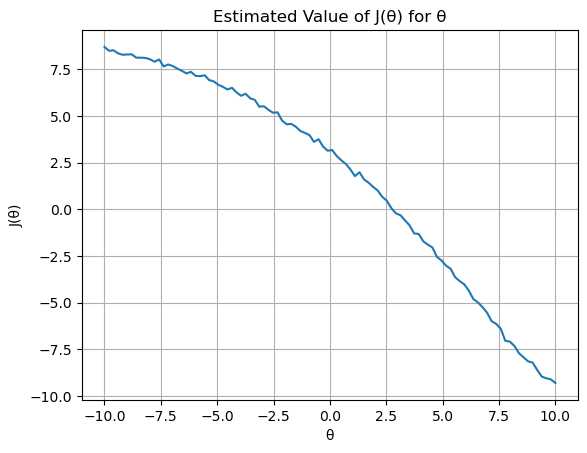

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10       # Length of the state space (example: L=10)
beta = 1   # Parameter for the sigmoid function
num_rollouts = 10000  # Number of Monte Carlo rollouts
num_steps = 2 * L + 3  # Max number of steps (from -L-1 to L+1)

# Reward structure
rNT = -1     # Reward for regular transitions
rL = 0       # Reward when absorbed at left terminal state
rR = 20      # Reward when absorbed at right terminal state

# Sigmoid policy
def policy(theta, s, beta=0.5):
    """Probability of going right (action R) in state s, given theta"""
    return 1 / (1 + np.exp(-beta * (s - theta)))

def simulate_episode(theta):
    """Simulate an episode for a given theta"""
    s = np.random.randint(-L, L+1)  # Start from a random state in the regular state space
    total_reward = 0
    while s != L + 1 and s != -(L + 1):  # Until reaching a terminal state
        action_prob = policy(theta, s)
        action = 1 if np.random.rand() < action_prob else -1  # Choose action (1 = R, -1 = L)
        
        if action == 1:
            s += 1  # Move right
            total_reward += rNT  # Transition within the regular state
        else:
            s -= 1  # Move left
            total_reward += rNT  # Transition within the regular state
        
    # Reward when reaching terminal state
    if s == L + 1:
        total_reward += rR  # Right terminal state
    else:
        total_reward += rL  # Left terminal state
    
    return total_reward

def estimate_J(theta):
    """Estimate J(theta) by averaging rewards over many rollouts"""
    rewards = [simulate_episode(theta) for _ in range(num_rollouts)]
    return np.mean(rewards)

# Compute J(theta) for a range of theta values
theta_values = np.linspace(-L, L, 100)  # Range of theta values
J_values = [estimate_J(theta) for theta in theta_values]

# Plot the estimated J(theta)
plt.plot(theta_values, J_values, label='J(θ)')
plt.xlabel('θ')
plt.ylabel('J(θ)')
plt.title('Estimated Value of J(θ) for θ')
plt.grid(True)
plt.show()


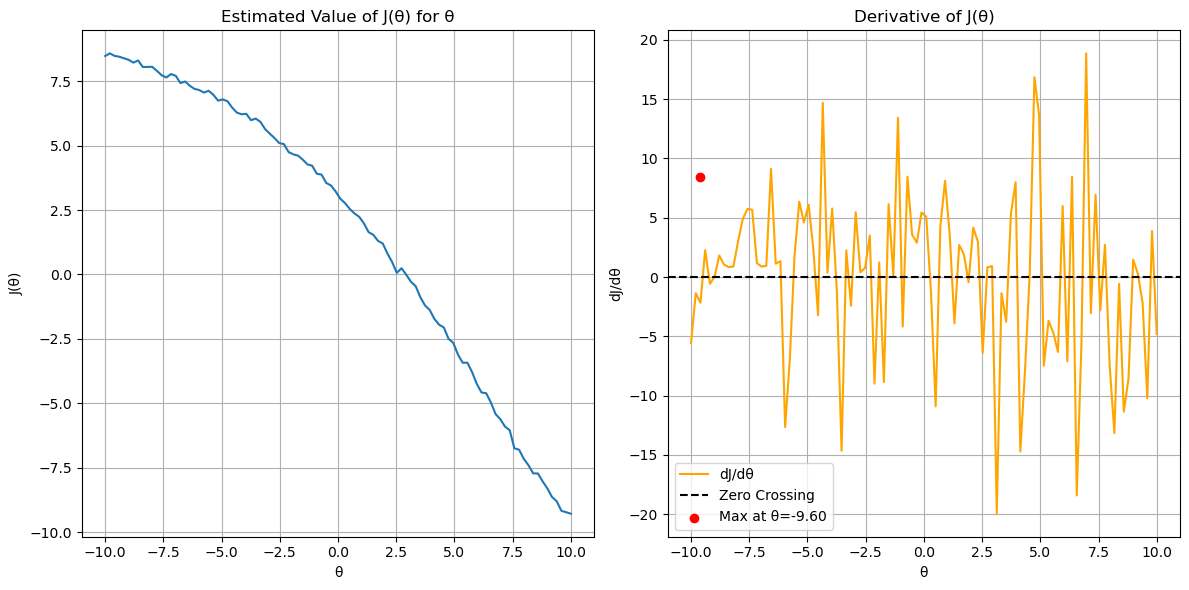

The approximate value of θ that maximizes J(θ) is: -9.60


In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10       # Length of the state space (example: L=10)
beta = 1   # Parameter for the sigmoid function
num_rollouts = 10000  # Number of Monte Carlo rollouts
num_steps = 2 * L + 3  # Max number of steps (from -L-1 to L+1)
h = 0.01     # Small value for numerical derivative

# Reward structure
rNT = -1     # Reward for regular transitions
rL = 0       # Reward when absorbed at left terminal state
rR = 20      # Reward when absorbed at right terminal state

# Sigmoid policy
def policy(theta, s, beta=0.5):
    """Probability of going right (action R) in state s, given theta"""
    return 1 / (1 + np.exp(-beta * (s - theta)))

def simulate_episode(theta):
    """Simulate an episode for a given theta"""
    s = np.random.randint(-L, L+1)  # Start from a random state in the regular state space
    total_reward = 0
    while s != L + 1 and s != -(L + 1):  # Until reaching a terminal state
        action_prob = policy(theta, s)
        action = 1 if np.random.rand() < action_prob else -1  # Choose action (1 = R, -1 = L)
        
        if action == 1:
            s += 1  # Move right
            total_reward += rNT  # Transition within the regular state
        else:
            s -= 1  # Move left
            total_reward += rNT  # Transition within the regular state
        
    # Reward when reaching terminal state
    if s == L + 1:
        total_reward += rR  # Right terminal state
    else:
        total_reward += rL  # Left terminal state
    
    return total_reward

def estimate_J(theta):
    """Estimate J(theta) by averaging rewards over many rollouts"""
    rewards = [simulate_episode(theta) for _ in range(num_rollouts)]
    return np.mean(rewards)

# Compute J(theta) for a range of theta values
theta_values = np.linspace(-L, L, 100)  # Range of theta values
J_values = [estimate_J(theta) for theta in theta_values]

# Numerical derivative (finite difference approximation)
def numerical_derivative(theta, h):
    """Estimate the derivative of J(theta) using finite difference"""
    J_plus_h = estimate_J(theta + h)
    J_minus_h = estimate_J(theta - h)
    return (J_plus_h - J_minus_h) / (2 * h)

# Compute the numerical derivative for each theta value
derivatives = [numerical_derivative(theta, h) for theta in theta_values]

# Find the zero-crossing of the derivative (approximate maximum of J(theta))
zero_crossing_idx = np.where(np.diff(np.sign(derivatives)))[0][0]  # Find where derivative changes sign
theta_max = theta_values[zero_crossing_idx]

# Plot the estimated J(theta) and the numerical derivative
plt.figure(figsize=(12, 6))

# Plot J(theta)
plt.subplot(1, 2, 1)
plt.plot(theta_values, J_values, label='J(θ)')
plt.xlabel('θ')
plt.ylabel('J(θ)')
plt.title('Estimated Value of J(θ) for θ')
plt.grid(True)

# Plot the derivative of J(theta)
plt.subplot(1, 2, 2)
plt.plot(theta_values, derivatives, label="dJ/dθ", color='orange')
plt.axhline(0, color='black', linestyle='--', label='Zero Crossing')
plt.xlabel('θ')
plt.ylabel('dJ/dθ')
plt.title('Derivative of J(θ)')
plt.grid(True)

# Display the maximum point
plt.scatter(theta_max, estimate_J(theta_max), color='red', label=f'Max at θ={theta_max:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

# Print the approximate value of θ that maximizes J(θ)
print(f"The approximate value of θ that maximizes J(θ) is: {theta_max:.2f}")


In [84]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10       # Length of the state space (example: L=10)
beta = 0.5   # Parameter for the sigmoid function
num_rollouts = 10000  # Number of Monte Carlo rollouts
num_steps = 2 * L + 3  # Max number of steps (from -L-1 to L+1)

# Reward structure
rNT = -1     # Reward for regular transitions
rL = 0       # Reward when absorbed at left terminal state
rR = 20      # Reward when absorbed at right terminal state

# Sigmoid policy
def policy(theta, s, beta=0.5):
    """Probability of going right (action R) in state s, given theta"""
    return 1 / (1 + np.exp(-beta * (s - theta)))

def log_policy_gradient(theta, s, a, beta=0.5):
    """Compute the gradient of the log of the policy"""
    p_R = policy(theta, s, beta)
    if a == 1:  # Action R
        return (1 - p_R) * beta * (s - theta)
    else:  # Action L
        return -p_R * beta * (s - theta)

def simulate_episode(theta):
    """Simulate an episode for a given theta and return the states, actions, and rewards"""
    states = []
    actions = []
    rewards = []
    s = np.random.randint(-L, L+1)  # Start from a random state in the regular state space
    total_reward = 0
    while s != L + 1 and s != -(L + 1):  # Until reaching a terminal state
        action_prob = policy(theta, s)
        action = 1 if np.random.rand() < action_prob else -1  # Choose action (1 = R, -1 = L)
        
        states.append(s)
        actions.append(action)
        
        if action == 1:
            s += 1  # Move right
            rewards.append(rNT)  # Transition within the regular state
        else:
            s -= 1  # Move left
            rewards.append(rNT)  # Transition within the regular state
        
    # Reward when reaching terminal state
    if s == L + 1:
        rewards.append(rR)  # Right terminal state
    else:
        rewards.append(rL)  # Left terminal state
    
    return states, actions, rewards

def compute_policy_gradient(theta):
    """Compute the policy gradient ∇J(θ) using Monte Carlo rollouts"""
    gradient = 0
    for _ in range(num_rollouts):
        states, actions, rewards = simulate_episode(theta)
        cumulative_reward = np.zeros(len(rewards))
        cumulative_reward[-1] = rewards[-1]
        for t in range(len(rewards) - 2, -1, -1):
            cumulative_reward[t] = rewards[t] + cumulative_reward[t + 1]  # Compute cumulative reward

        # Compute gradient for each step in the episode
        for t in range(len(states)):
            gradient += cumulative_reward[t] * log_policy_gradient(theta, states[t], actions[t])
    
    # Average over the number of rollouts
    return gradient / num_rollouts


#print the gradient ∇J
print(compute_policy_gradient(0.0))

# Compute the policy gradient for a range of theta values
theta_values = np.linspace(-L, L, 100)  # Range of theta values
gradients = [compute_policy_gradient(theta) for theta in theta_values]


2.0810441459425855


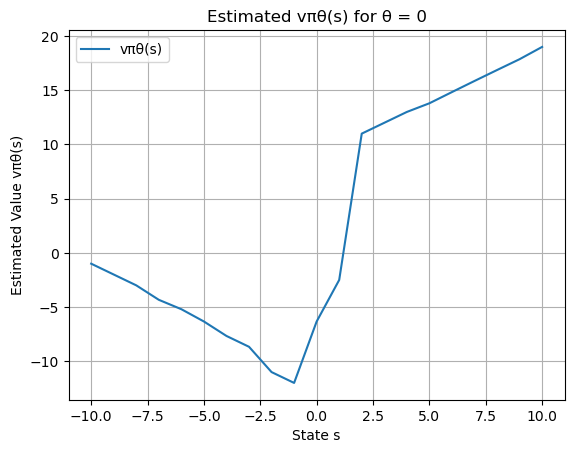

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10         # Length of the state space (example: L=10)
beta = 0.5     # Parameter for the sigmoid function
gamma = 1      # No discounting (γ = 1)
num_rollouts = 30  # Number of Monte Carlo rollouts
num_steps = 2 * L + 3  # Max number of steps (from -L-1 to L+1)
theta_0 = 0    # Initial policy parameter (θ0 = 0)

# Reward structure
rNT = -1     # Reward for regular transitions
rL = 0       # Reward when absorbed at left terminal state
rR = 20      # Reward when absorbed at right terminal state

# Sigmoid policy
def policy(theta, s, beta=0.5):
    """Probability of going right (action R) in state s, given theta"""
    return 1 / (1 + np.exp(-beta * (s - theta)))

def simulate_episode(theta):
    """Simulate an episode for a given theta and return the states, actions, and rewards"""
    states = []
    actions = []
    rewards = []
    s = np.random.randint(-L, L+1)  # Start from a random state in the regular state space
    total_reward = 0
    while s != L + 1 and s != -(L + 1):  # Until reaching a terminal state
        action_prob = policy(theta, s)
        action = 1 if np.random.rand() < action_prob else -1  # Choose action (1 = R, -1 = L)
        
        states.append(s)
        actions.append(action)
        
        if action == 1:
            s += 1  # Move right
            rewards.append(rNT)  # Transition within the regular state
        else:
            s -= 1  # Move left
            rewards.append(rNT)  # Transition within the regular state
        
    # Reward when reaching terminal state
    if s == L + 1:
        rewards.append(rR)  # Right terminal state
    else:
        rewards.append(rL)  # Left terminal state
    
    return states, actions, rewards

def estimate_value_function(theta, num_rollouts=100):
    """Estimate vπθ(s) for all states using Monte Carlo rollouts"""
    v_estimates = {s: 0 for s in range(-L, L+1)}  # Initialize v(s) estimates
    state_counts = {s: 0 for s in range(-L, L+1)}  # Count how many times each state appears

    for _ in range(num_rollouts):
        states, actions, rewards = simulate_episode(theta)
        cumulative_reward = np.zeros(len(rewards))
        cumulative_reward[-1] = rewards[-1]
        
        # Backward pass to calculate cumulative rewards
        for t in range(len(rewards) - 2, -1, -1):
            cumulative_reward[t] = rewards[t] + gamma * cumulative_reward[t + 1]

        # Update v(s) for each state encountered in the episode
        for t in range(len(states)):
            s = states[t]
            v_estimates[s] += cumulative_reward[t]
            state_counts[s] += 1
    
    # Normalize v(s) estimates by the number of times each state is visited
    for s in v_estimates:
        if state_counts[s] > 0:
            v_estimates[s] /= state_counts[s]
    
    return v_estimates

# Estimate vπθ(s) for all states
v_estimates = estimate_value_function(theta_0, num_rollouts)

# Plot the estimated value function
states = np.arange(-L, L+1)
values = [v_estimates[s] for s in states]
plt.plot(states, values, label='vπθ(s)')
plt.xlabel('State s')
plt.ylabel('Estimated Value vπθ(s)')
plt.title('Estimated vπθ(s) for θ = {}'.format(theta_0))
plt.grid(True)
plt.legend()
plt.show()


In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10         # Length of the state space (example: L=10)
beta = 0.5     # Parameter for the sigmoid function
gamma = 1      # No discounting (γ = 1)
num_rollouts = 100  # Number of Monte Carlo rollouts
num_steps = 2 * L + 3  # Max number of steps (from -L-1 to L+1)
theta_0 = 0    # Initial policy parameter (θ0 = 0)

# Reward structure
rNT = -1     # Reward for regular transitions
rL = 0       # Reward when absorbed at left terminal state
rR = 20      # Reward when absorbed at right terminal state

# Sigmoid policy
def policy(theta, s, beta=0.5):
    """Probability of going right (action R) in state s, given theta"""
    return 1 / (1 + np.exp(-beta * (s - theta)))

def simulate_episode(theta):
    """Simulate an episode for a given theta and return the states, actions, and rewards"""
    states = []
    actions = []
    rewards = []
    s = np.random.randint(-L, L+1)  # Start from a random state in the regular state space
    total_reward = 0
    while s != L + 1 and s != -(L + 1):  # Until reaching a terminal state
        action_prob = policy(theta, s)
        action = 1 if np.random.rand() < action_prob else -1  # Choose action (1 = R, -1 = L)
        
        states.append(s)
        actions.append(action)
        
        if action == 1:
            s += 1  # Move right
            rewards.append(rNT)  # Transition within the regular state
        else:
            s -= 1  # Move left
            rewards.append(rNT)  # Transition within the regular state
        
    # Reward when reaching terminal state
    if s == L + 1:
        rewards.append(rR)  # Right terminal state
    else:
        rewards.append(rL)  # Left terminal state
    
    return states, actions, rewards

def estimate_value_function(theta, num_rollouts=100):
    """Estimate vπθ(s) for all states using Monte Carlo rollouts"""
    v_estimates = {s: 0 for s in range(-L, L+1)}  # Initialize v(s) estimates
    state_counts = {s: 0 for s in range(-L, L+1)}  # Count how many times each state appears

    for _ in range(num_rollouts):
        states, actions, rewards = simulate_episode(theta)
        cumulative_reward = np.zeros(len(rewards))
        cumulative_reward[-1] = rewards[-1]
        
        # Backward pass to calculate cumulative rewards
        for t in range(len(rewards) - 2, -1, -1):
            cumulative_reward[t] = rewards[t] + gamma * cumulative_reward[t + 1]

        # Update v(s) for each state encountered in the episode
        for t in range(len(states)):
            s = states[t]
            v_estimates[s] += cumulative_reward[t]
            state_counts[s] += 1
    
    # Normalize v(s) estimates by the number of times each state is visited
    for s in v_estimates:
        if state_counts[s] > 0:
            v_estimates[s] /= state_counts[s]
    
    return v_estimates

def compute_policy_gradient(theta, v_estimates, num_rollouts=100):
    """Compute the policy gradient using the advantage method"""
    policy_gradients = np.zeros_like(theta, dtype=float)
    
    for _ in range(num_rollouts):
        states, actions, rewards = simulate_episode(theta)
        cumulative_reward = np.zeros(len(rewards))
        cumulative_reward[-1] = rewards[-1]
        
        # Backward pass to calculate cumulative rewards
        for t in range(len(rewards) - 2, -1, -1):
            cumulative_reward[t] = rewards[t] + gamma * cumulative_reward[t + 1]

        # Compute the advantage and the policy gradient
        for t in range(len(states)):
            s = states[t]
            a = actions[t]
            q_hat = cumulative_reward[t]
            v_s = v_estimates[s]
            advantage = q_hat - v_s
            
            # Gradient of the log-probability of the action taken
            if a == 1:  # Action R
                grad_log_pi = beta * (states[t] - theta) * policy(theta, s) * (1 - policy(theta, s))
            else:  # Action L
                grad_log_pi = -beta * (states[t] - theta) * policy(theta, s) * (1 - policy(theta, s))
            
            # Update the policy gradient using the advantage
            policy_gradients += advantage * grad_log_pi
    
    # Normalize the gradient by the number of rollouts
    policy_gradients /= num_rollouts
    return policy_gradients

# Initialize the value function estimate
v_estimates = estimate_value_function(theta_0, num_rollouts)

# Compute the policy gradient
gradients = compute_policy_gradient(theta_0, v_estimates, num_rollouts)

# Output the computed policy gradient
print("Computed policy gradient:", gradients)



Computed policy gradient: 0.19486870823188945


Iteration 0:
  θ = 0.6990517351989467
  Gradient = 0.5041830269670573
  Value estimates = {-10: -1.0097560975609756, -9: -2.0279569892473117, -8: -3.066350710900474, -7: -4.118110236220472, -6: -5.21865889212828, -5: -6.422442244224422, -4: -7.774545454545454, -3: -9.19277108433735, -2: -10.196544276457884, -1: -9.731543624161073, 0: -5.955947136563877, 1: 0.19955654101995565, 2: 6.136659436008677, 3: 10.236514522821576, 4: 12.257462686567164, 5: 13.517123287671232, 6: 14.694152923538232, 7: 15.811518324607329, 8: 16.892984542211654, 9: 17.962513781697904, 10: 18.9959266802444}
Iteration 1:
  θ = 1.2005582070511505
  Gradient = 0.5015064718522037
  Value estimates = {-10: -1.001865671641791, -9: -2.014271151885831, -8: -3.0405405405405403, -7: -4.083969465648855, -6: -5.163793103448276, -5: -6.343042071197411, -4: -7.49438202247191, -3: -8.74120082815735, -2: -10.159235668789808, -1: -10.651982378854626, 0: -9.102678571428571, 1: -3.889952153110048, 2: 3.6858513189448443, 3: 8.88988764

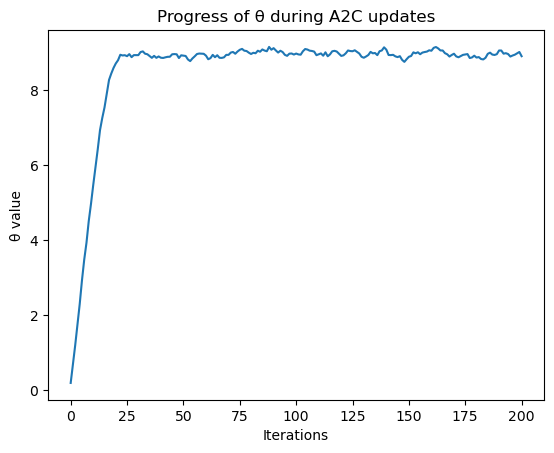

Final value of θ: 8.904823615679963


In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10         # Length of the state space (example: L=10)
beta = 0.5     # Parameter for the sigmoid function
gamma = 1      # No discounting (γ = 1)
num_rollouts = 2000  # Number of Monte Carlo rollouts
num_steps = 2 * L + 3  # Max number of steps (from -L-1 to L+1)
theta_0 = 0.19486870823188945    # Initial policy parameter (θ0 = 0)
alpha = 1   # Learning rate for gradient ascent
max_iterations = 200  # Maximum number of iterations
convergence_threshold = 0.01  # Threshold for convergence

# Reward structure
rNT = -1     # Reward for regular transitions
rL = 0       # Reward when absorbed at left terminal state
rR = 20      # Reward when absorbed at right terminal state

# Sigmoid policy
def policy(theta, s, beta=0.5):
    """Probability of going right (action R) in state s, given theta"""
    return 1 / (1 + np.exp(-beta * (s - theta)))

def simulate_episode(theta):
    """Simulate an episode for a given theta and return the states, actions, and rewards"""
    states = []
    actions = []
    rewards = []
    s = np.random.randint(-L, L+1)  # Start from a random state in the regular state space
    total_reward = 0
    while s != L + 1 and s != -(L + 1):  # Until reaching a terminal state
        action_prob = policy(theta, s)
        action = 1 if np.random.rand() < action_prob else -1  # Choose action (1 = R, -1 = L)
        
        states.append(s)
        actions.append(action)
        
        if action == 1:
            s += 1  # Move right
            rewards.append(rNT)  # Transition within the regular state
        else:
            s -= 1  # Move left
            rewards.append(rNT)  # Transition within the regular state
        
    # Reward when reaching terminal state
    if s == L + 1:
        rewards.append(rR)  # Right terminal state
    else:
        rewards.append(rL)  # Left terminal state
    
    return states, actions, rewards

def estimate_value_function(theta, num_rollouts=100):
    """Estimate vπθ(s) for all states using Monte Carlo rollouts"""
    v_estimates = {s: 0 for s in range(-L, L+1)}  # Initialize v(s) estimates
    state_counts = {s: 0 for s in range(-L, L+1)}  # Count how many times each state appears

    for _ in range(num_rollouts):
        states, actions, rewards = simulate_episode(theta)
        cumulative_reward = np.zeros(len(rewards))
        cumulative_reward[-1] = rewards[-1]
        
        # Backward pass to calculate cumulative rewards
        for t in range(len(rewards) - 2, -1, -1):
            cumulative_reward[t] = rewards[t] + gamma * cumulative_reward[t + 1]

        # Update v(s) for each state encountered in the episode
        for t in range(len(states)):
            s = states[t]
            v_estimates[s] += cumulative_reward[t]
            state_counts[s] += 1
    
    # Normalize v(s) estimates by the number of times each state is visited
    for s in v_estimates:
        if state_counts[s] > 0:
            v_estimates[s] /= state_counts[s]
    
    return v_estimates

def compute_policy_gradient(theta, v_estimates, num_rollouts=100):
    """Compute the policy gradient using the advantage method."""
    policy_gradients = 0  # Initialize scalar gradient since theta is scalar
    
    for _ in range(num_rollouts):
        states, actions, rewards = simulate_episode(theta)
        cumulative_reward = np.zeros(len(rewards))
        cumulative_reward[-1] = rewards[-1]
        
        # Backward pass to calculate cumulative rewards
        for t in range(len(rewards) - 2, -1, -1):
            cumulative_reward[t] = rewards[t] + gamma * cumulative_reward[t + 1]

        # Compute the advantage and the policy gradient
        advantages = []
        for t in range(len(states)):
            s = states[t]
            q_hat = cumulative_reward[t]
            v_s = v_estimates[s]
            advantage = q_hat - v_s
            advantages.append(advantage)
            
            # Gradient of the log-probability of the action taken
            a = actions[t]
            if a == 1:  # Action R
                grad_log_pi = beta * (s - theta) * policy(theta, s) * (1 - policy(theta, s))
            else:  # Action L
                grad_log_pi = -beta * (s - theta) * policy(theta, s) * (1 - policy(theta, s))
            
            # Update the policy gradient
            policy_gradients += advantage * grad_log_pi
        
        # Normalize advantages
        advantages = np.array(advantages)
        advantages = (advantages - np.mean(advantages)) / (np.std(advantages) + 1e-8)

    # Normalize the gradient by the number of rollouts
    policy_gradients /= num_rollouts

    return policy_gradients


# Initialize theta and list to store θ values
theta = float(theta_0)
theta_values = [theta]

# Iteratively update θ using the policy gradient
# Iteratively update θ using the policy gradient
for iteration in range(max_iterations):
    # Estimate the value function
    v_estimates = estimate_value_function(theta, num_rollouts)
    
    # Compute the policy gradient
    grad = compute_policy_gradient(theta, v_estimates, num_rollouts)
    
    # Clip the gradient to avoid divergence
    grad = np.clip(grad, -1, 1)  # Add this line

    # Update θ using gradient ascent
    theta += alpha * grad
    
    # Store the updated θ
    theta_values.append(theta)

    # Debug information
    print(f"Iteration {iteration}:")
    print(f"  θ = {theta}")
    print(f"  Gradient = {grad}")
    print(f"  Value estimates = {v_estimates}")
    


# Plot the progress of θ over iterations
plt.plot(theta_values)
plt.title('Progress of θ during A2C updates')
plt.xlabel('Iterations')
plt.ylabel('θ value')
plt.show()

print("Final value of θ:", theta)
